In [0]:
# Importar librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import json

In [0]:
#load training data
with open('train_set.json') as json_file:
    data = json.load(json_file)

La posición 0 del train_set corresponde a los atributos y La posición 1 a las etiquetas

In [0]:
x_data=np.array(data[0])
y_data=np.array(data[1])

Preparación de las etiquetas a categorías

In [10]:
from keras.utils import to_categorical
from sklearn.utils import shuffle

Using TensorFlow backend.


In [0]:
categorical_y_data=to_categorical(y_data)

#shufle data
x_data, y_data = shuffle(x_data, y_data,random_state=20)

Spliting text into train and test set 

In [0]:
train_size = round(len(x_data)*0.7);
x_data_train, x_data_test = x_data[:train_size,:], x_data[train_size:,:]
y_data_train = y_data[:train_size]
y_data_test = y_data[train_size:]

Crear la arquitectura de la red neuronal, formada por dos capas ocultas
La capa de salida representa 5 categorías posibles (0 a 4, correspondientes con cada una de las vocales del Español respectivamente)

In [0]:
from keras import models
from keras import layers

In [0]:
network = models.Sequential()

# Capa de entrada (con 20 distancias de las faciallandmarks) y primera capa oculta 
network.add(layers.Dense(512, activation='relu', input_shape=(20,)))
network.add(layers.Dense(512, activation='relu'))

# Capa de salida
network.add(layers.Dense(5, activation='softmax'))

# Definir la función de pérdida, el optimizador y las métricas para monitorizar el entrenamiento y la prueba de validación
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [61]:
# Realizar el entrenamiento. Guardar el resultado en una variable denominada ‘historia’
history = network.fit(x_data_train, y_data_train, epochs=150, batch_size=128, validation_data=(x_data_test, y_data_test))

Train on 920 samples, validate on 395 samples
Epoch 1/150
920/920 [==============================] - 1s 602us/step - loss: 9.7078 - acc: 0.2054 - val_loss: 10.1847 - val_acc: 0.1924
Epoch 2/150
920/920 [==============================] - 0s 48us/step - loss: 7.2135 - acc: 0.2043 - val_loss: 5.4085 - val_acc: 0.2203
Epoch 3/150
920/920 [==============================] - 0s 41us/step - loss: 4.8022 - acc: 0.2804 - val_loss: 4.1652 - val_acc: 0.3291
Epoch 4/150
920/920 [==============================] - 0s 42us/step - loss: 4.5131 - acc: 0.3315 - val_loss: 4.7260 - val_acc: 0.2759
Epoch 5/150
920/920 [==============================] - 0s 41us/step - loss: 4.6333 - acc: 0.3033 - val_loss: 4.2466 - val_acc: 0.1949
Epoch 6/150
920/920 [==============================] - 0s 45us/step - loss: 4.4540 - acc: 0.3391 - val_loss: 4.9208 - val_acc: 0.2430
Epoch 7/150
920/920 [==============================] - 0s 43us/step - loss: 4.0361 - acc: 0.3141 - val_loss: 1.5320 - val_acc: 0.3924
Epoch 8/150
92

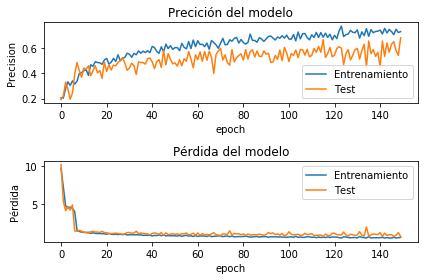

In [62]:
# Visualizar las métricas
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Precición del modelo')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper right')

plt.tight_layout()

plt.show()

In [63]:
#fig

# Comprobar el ajuste o error del modelo respecto del conjunto de prueba
test_loss, test_acc = network.evaluate(x_data_test, y_data_test)
print('test_acc:', test_acc)

395/395 [==============================] - 0s 80us/step
test_acc: 0.6784810131109213


Guardar el modelo en formato JSON

In [0]:
from keras.models import model_from_json
model_json = network.to_json()
with open("network_clase.json", "w") as json_file:
    json_file.write(model_json)



Guardar los pesos de la red

In [67]:
network.save_weights("network_weights_clase.h5")
print("Guardado el modelo a disco")

Guardado el modelo a disco


#Test del Modelo
cargado del modelo en json compilado

In [68]:
# Leer JSON y crear el modelo
from keras.models import model_from_json

json_file = open("network_clase.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Cargar los pesos (weights) en un nuevo modelo
loaded_model.load_weights("network_weights_clase.h5")
print("Modelo cargado desde el disco")

Modelo cargado desde el disco


In [0]:
# Predecir sobre el conjunto de test
predicted_classes = loaded_model.predict_classes(x_data_test)

In [86]:
right_predicted=0
wrong_predicted=0

for i in range(len(predicted_classes)):
  if(predicted_classes[i]==np.nonzero(y_data_test[i])):
    right_predicted=right_predicted+1
  else:
    wrong_predicted=wrong_predicted+1

print(right_predicted,"clasificados correctamente")
print(wrong_predicted,"clasificados incorrectamente")

268 clasificados correctamente
127 clasificados incorrectamente
